Importing all required libraries for analysis

In [1]:
# import all required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the csv file downloaded in a dataframe

In [2]:
# open the csv file

df = pd.read_csv("Employee_data.csv")

df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


Check shape, summary statistics, info of the dataframe

In [3]:
df.shape

(4653, 9)

In [4]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


Check if there are any duplicated values

In [6]:
# check for duplicate values

df.duplicated().sum()

1889

Delete the duplicate values

In [7]:
# delete duplicate values

df = df.drop_duplicates()

In [8]:
df.shape

(2764, 9)

Check for the unique values found in each column of the dataset

In [9]:
# check unique value count of each column

df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

Calculate count of employees based on their education

In [10]:
# distribution of employees by thier education

education_count = df['Education'].value_counts()
education_count

Education
Bachelors    1971
Masters       637
PHD           156
Name: count, dtype: int64

Pie chart showing the percent distribution of the employees in the dataset

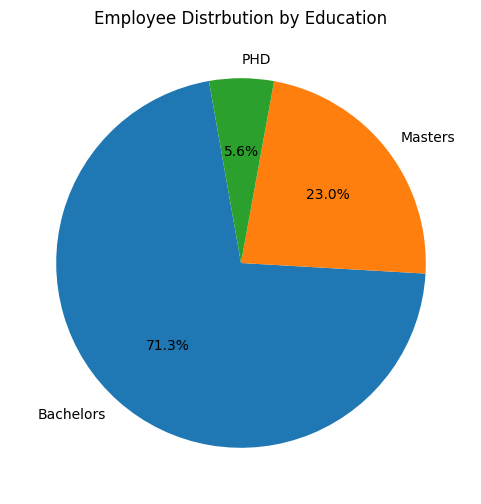

In [11]:
# visualization of education distribution by pie chart

plt.figure(figsize=(6, 6))
plt.pie(education_count, labels=education_count.index, autopct="%1.1f%%", startangle=100)
plt.title("Employee Distrbution by Education")
plt.show()

Count of employees based on their joining year

In [12]:
# employee count by joining year

df['JoiningYear'].value_counts()

JoiningYear
2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: count, dtype: int64

Bar plot for the Count of Employees by joining year

Text(0.5, 1.0, 'Count of Employees by Joining Year')

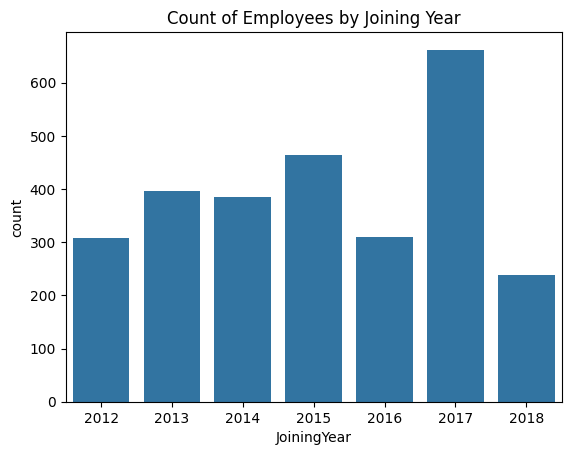

In [13]:
sns.countplot(data=df, x="JoiningYear")
plt.title("Count of Employees by Joining Year")

Employee count by city and its visual distribution

In [14]:
# employee count by city

city_count = df['City'].value_counts()
city_count

City
Bangalore    1171
Pune          801
New Delhi     792
Name: count, dtype: int64

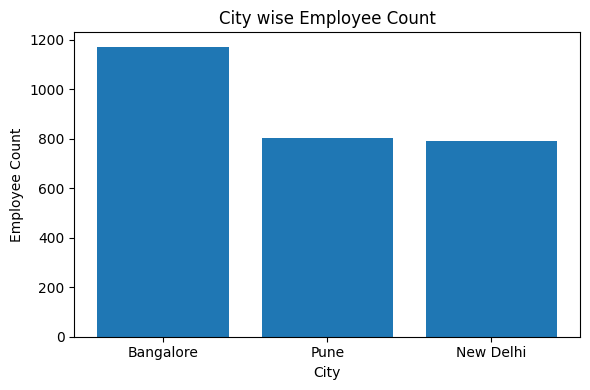

In [15]:
# visualization of employee count by city 

plt.figure(figsize=(6, 4))
plt.bar(city_count.index, city_count.values)
plt.title('City wise Employee Count')
plt.xlabel('City')
plt.ylabel('Employee Count')
plt.tight_layout()
plt.show()


Count of employees by payment tier and its visualization

In [16]:
# employee count by payment tier

df['PaymentTier'].value_counts()

PaymentTier
3    1976
2     570
1     218
Name: count, dtype: int64

<Axes: xlabel='PaymentTier', ylabel='count'>

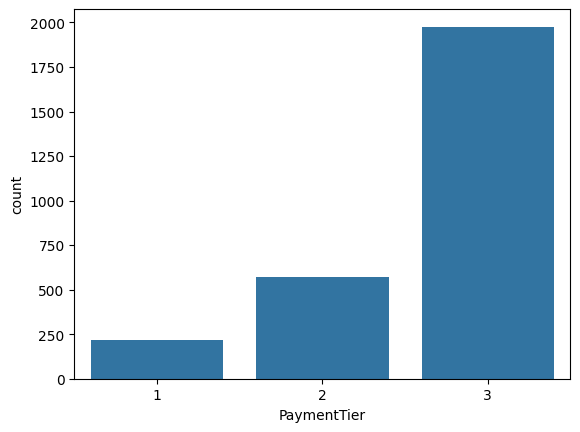

In [17]:
# visualization of employee count by payment tier

sns.countplot(data=df, x='PaymentTier')

Visualizing Employee distribution by city and joining year

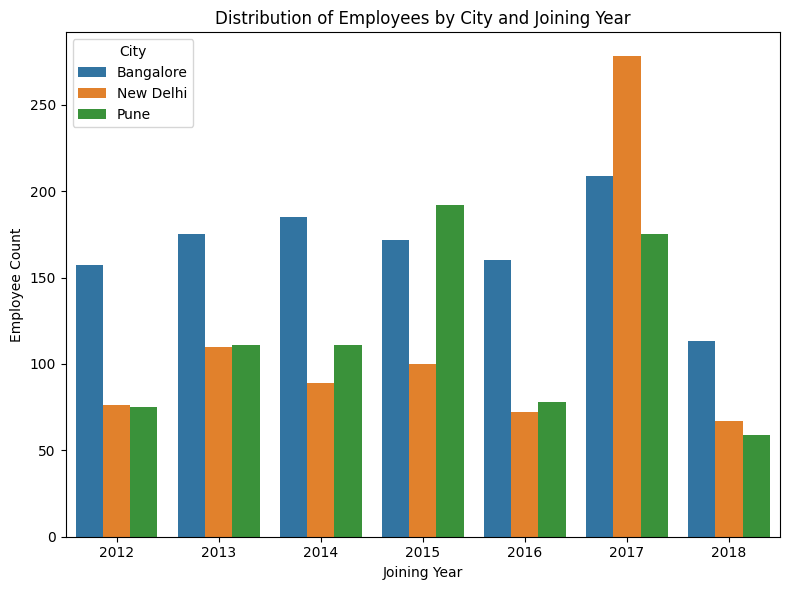

In [18]:
# visualization of employee distribution by city and joining year

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='JoiningYear', hue='City')
plt.title('Distribution of Employees by City and Joining Year')
plt.xlabel('Joining Year')
plt.ylabel('Employee Count')
plt.legend(title='City', loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

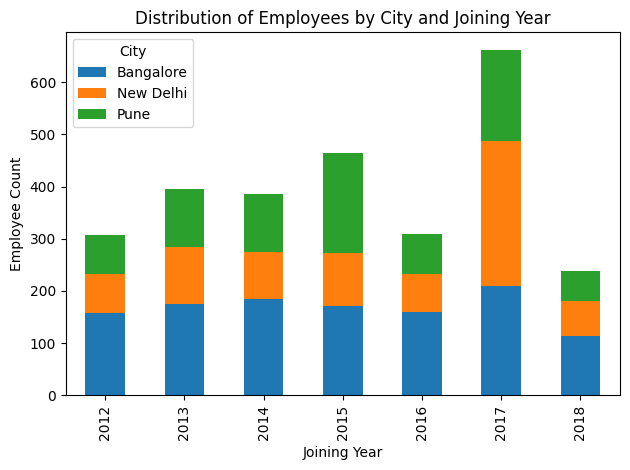

In [19]:
# visualization of employee distribution by city and joining year (stacked chart)

pivot1 = df.groupby(['JoiningYear', 'City']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
pivot1.plot(kind='bar', stacked=True)
plt.title('Distribution of Employees by City and Joining Year')
plt.xlabel('Joining Year')
plt.ylabel('Employee Count')
plt.legend(title='City', loc='upper left')
plt.tight_layout()
plt.show()

Visualizing Employee count by city and payment tier

<Figure size 600x400 with 0 Axes>

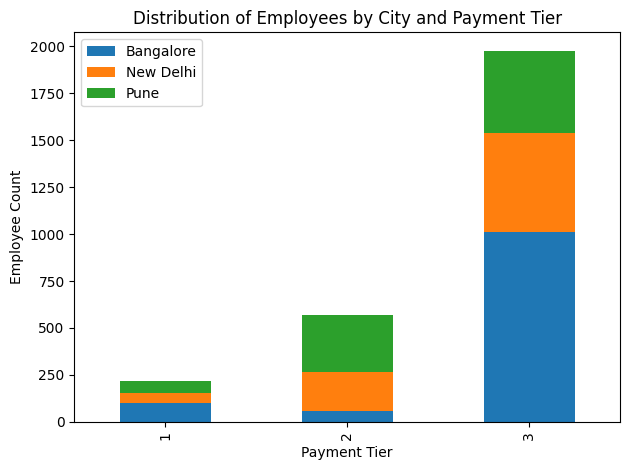

In [20]:
# distribution of employees by city and payment tier

pivot2 = df.groupby(['PaymentTier', 'City']).size().unstack(fill_value=0)

plt.figure(figsize=(6, 4))
pivot2.plot(kind='bar', stacked=True)
plt.title('Distribution of Employees by City and Payment Tier')
plt.xlabel('Payment Tier')
plt.ylabel('Employee Count')
plt.legend()
plt.tight_layout()
plt.show()

Visualizing Employee Count by age

Text(0.5, 1.0, 'Distribution of Employee Count by Age')

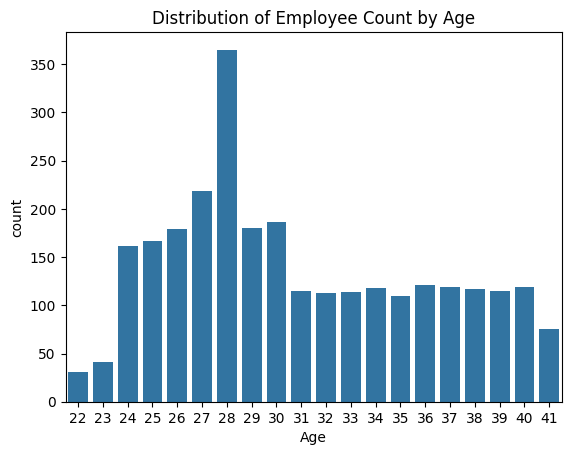

In [21]:
# Employee count by their age

sns.countplot(data=df, x='Age')
plt.title('Distribution of Employee Count by Age')

Boxplot for Age of Employees

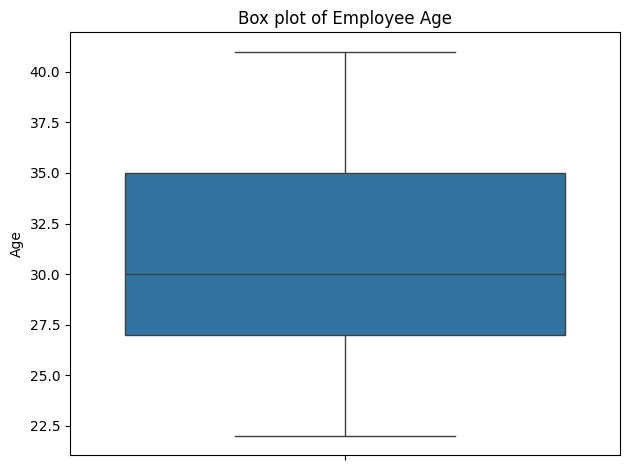

In [22]:
# boxplot of age

sns.boxplot(data=df, y='Age')
plt.title('Box plot of Employee Age')
plt.tight_layout()
plt.show()

Visualizing distribution of gender of employees in the dataset 

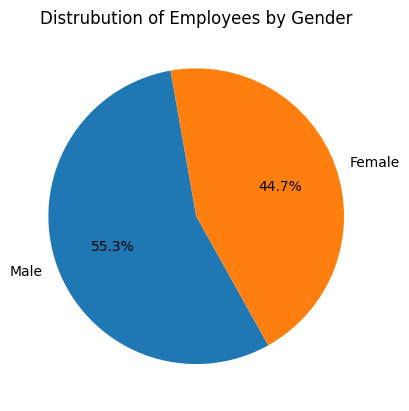

In [23]:
# distribution of employees by gender

gender_count = df['Gender'].value_counts()

plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=100)
plt.title('Distrubution of Employees by Gender')
plt.show()

Visualizing gender distribution by payment tier

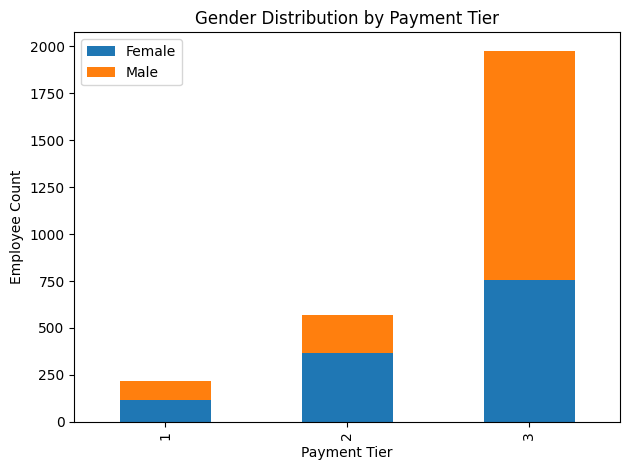

In [24]:
# gender distribution by payment tier

pivot3 = df.groupby(['PaymentTier', 'Gender']).size().unstack(fill_value=0)

pivot3.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Payment Tier')
plt.xlabel('Payment Tier')
plt.ylabel('Employee Count')
plt.legend()
plt.tight_layout()
plt.show()

Visualizing Employee count by EverBenched status in the dataset

<Axes: xlabel='EverBenched', ylabel='count'>

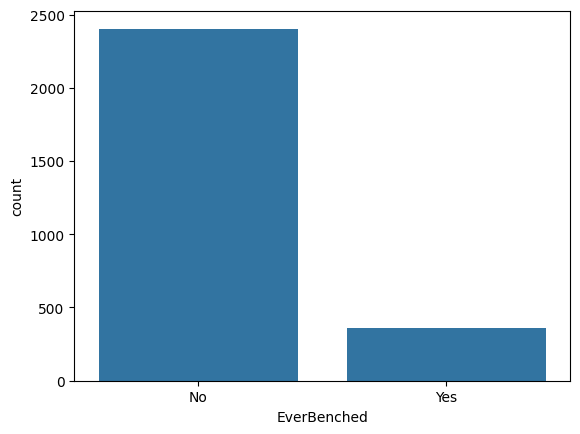

In [25]:
# employee count by EverBenched status

sns.countplot(data=df, x='EverBenched')

visualizing distrubution of employee by experience in current domain


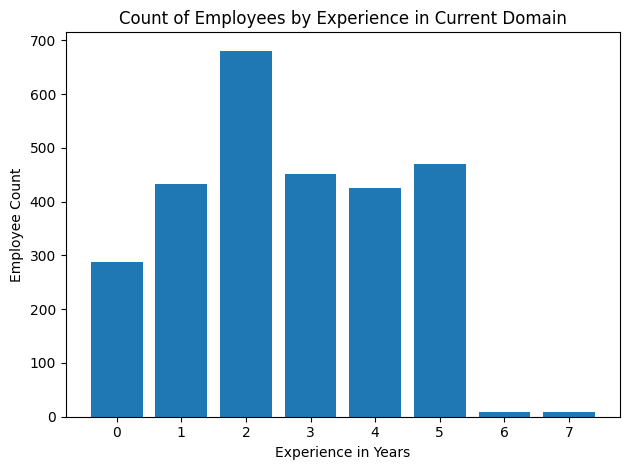

In [26]:
# distrubution of employee by experience in current domain

emp_experience_count = df['ExperienceInCurrentDomain'].value_counts()

plt.bar(emp_experience_count.index, emp_experience_count.values)
plt.title('Count of Employees by Experience in Current Domain')
plt.xlabel('Experience in Years')
plt.ylabel('Employee Count')
plt.tight_layout()
plt.show()

Visualizing distribution of payment tier and experience

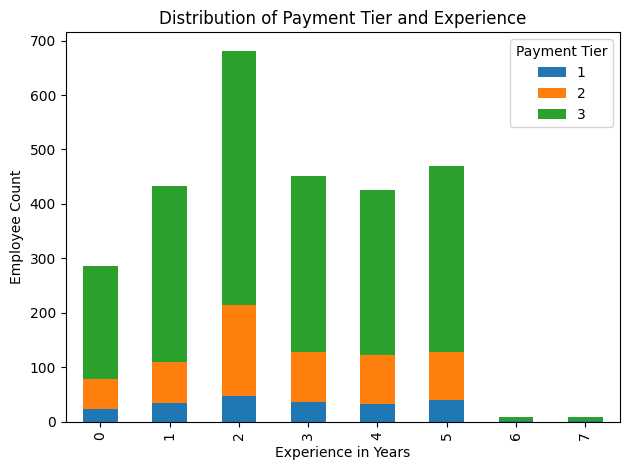

In [27]:
# payment tier and experience

pivot4 = df.groupby(['ExperienceInCurrentDomain', 'PaymentTier']).size().unstack(fill_value=0)

pivot4.plot(kind='bar', stacked=True)
plt.title('Distribution of Payment Tier and Experience')
plt.xlabel('Experience in Years')
plt.ylabel('Employee Count')
plt.legend(title='Payment Tier')
plt.tight_layout()
plt.show()

Employee Attrition distribution

Text(0.5, 1.0, 'Attrition Distribution')

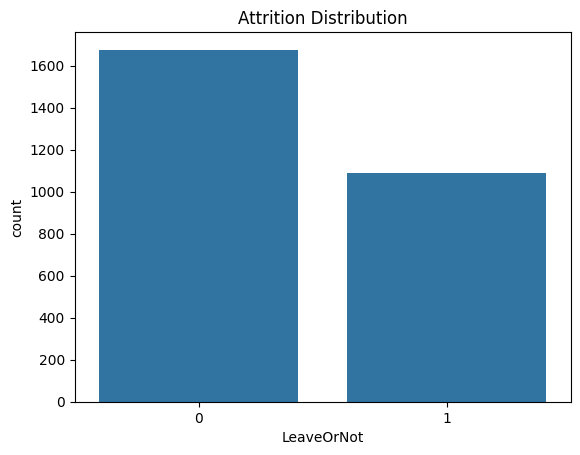

In [28]:
# attrition distribution

sns.countplot(data=df, x='LeaveOrNot')
plt.title('Attrition Distribution')

Employee Attrition by Gender

Text(0.5, 1.0, 'Employee Attrition by Gender')

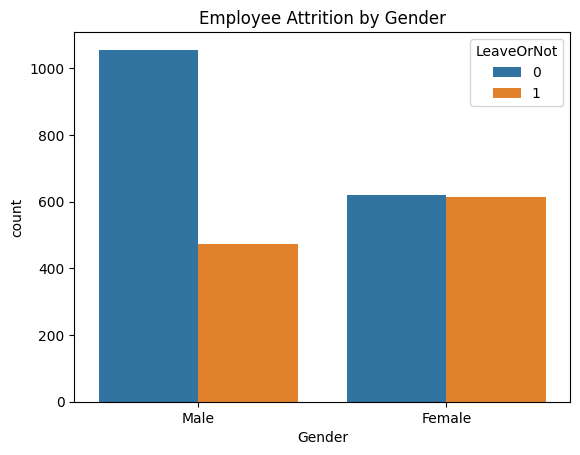

In [29]:
# employee attrition by gender

sns.countplot(data=df, x='Gender', hue='LeaveOrNot')
plt.title('Employee Attrition by Gender')

Employee Attrition by City

Text(0.5, 1.0, 'Employee Attrition by City')

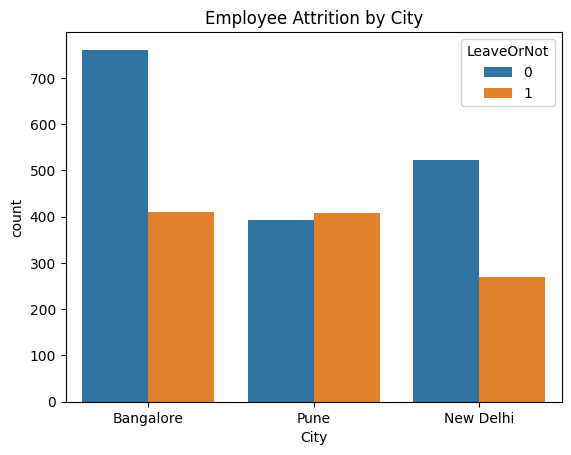

In [30]:
# employee attrition by city

sns.countplot(data=df, x='City', hue='LeaveOrNot')
plt.title('Employee Attrition by City')

Employee Attrition by Experience

Text(0.5, 1.0, 'Employee Attrition by Experience in Years')

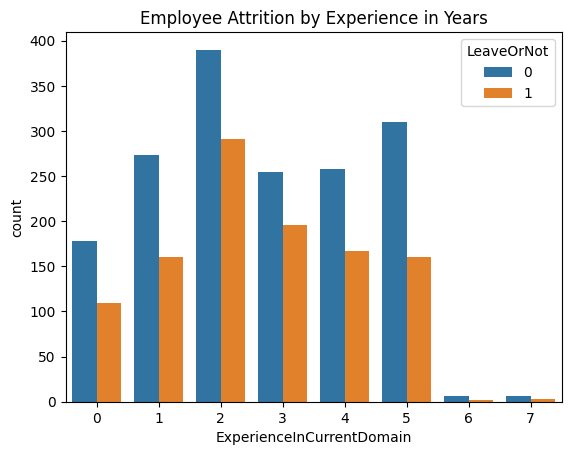

In [31]:
# employee attrition by experience

sns.countplot(data=df, x='ExperienceInCurrentDomain', hue='LeaveOrNot')
plt.title('Employee Attrition by Experience in Years')

Employee Attrition by Payment Tier

Text(0.5, 1.0, 'Employee Attrition by Payment Tier')

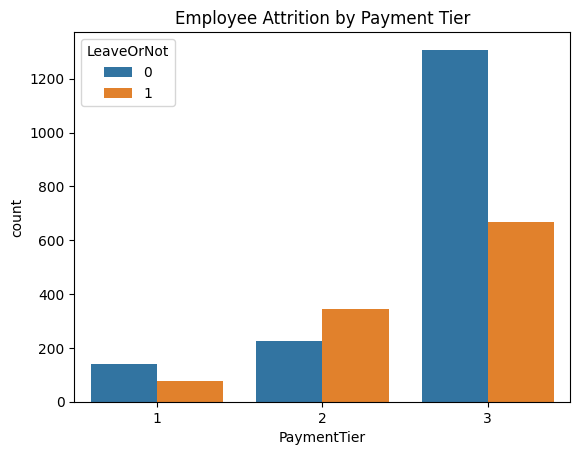

In [32]:
# employee attrition by payment tier

sns.countplot(data=df, x='PaymentTier', hue='LeaveOrNot')
plt.title('Employee Attrition by Payment Tier')

Employee Attrition by Age

Text(0.5, 1.0, 'Employee Attrition by Age')

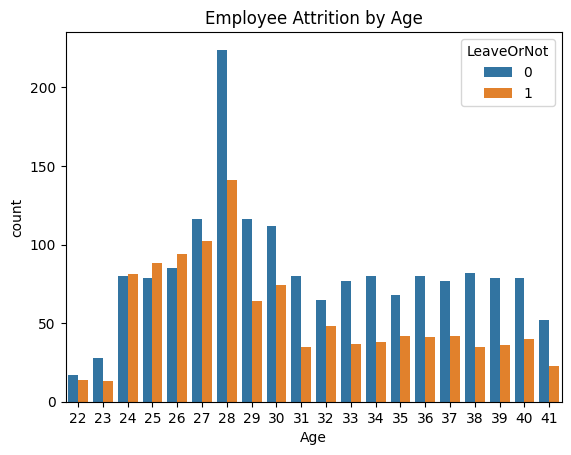

In [33]:
# employee attrition by age

sns.countplot(data=df, x='Age', hue='LeaveOrNot')
plt.title('Employee Attrition by Age')

Employee Attrition by EverBenched status

Text(0.5, 1.0, 'Employee Attrition by Ever Benched Status')

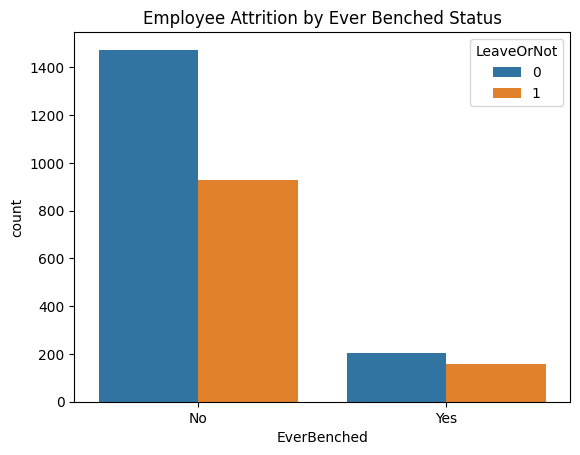

In [34]:
# employee attrition by ever benched status

sns.countplot(data=df, x='EverBenched', hue='LeaveOrNot')
plt.title('Employee Attrition by Ever Benched Status')

Correlation of LeaveOrNot Status and Age

<Axes: xlabel='LeaveOrNot', ylabel='Age'>

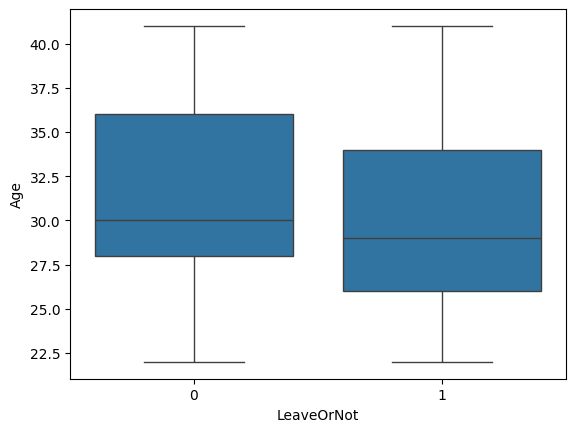

In [35]:
# correlation of leave or not status and age

sns.boxplot(data=df, x='LeaveOrNot', y='Age')

Correlation of Numeric values in the dataset

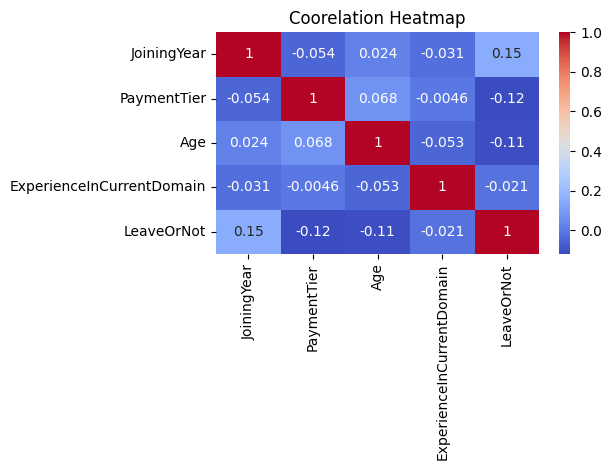

In [36]:
# correlation heatmap of numeric values

numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Coorelation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['City'] = le.fit_transform(df['City'])
df['Gender'] = le.fit_transform(df['Gender'])
df['EverBenched'] = le.fit_transform(df['EverBenched'])


In [39]:
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
y_pred = model.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred)

0.650994575045208

In [44]:
confusion_matrix(y_test, y_pred)

array([[283,  50],
       [143,  77]], dtype=int64)

In [45]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.85      0.75       333
           1       0.61      0.35      0.44       220

    accuracy                           0.65       553
   macro avg       0.64      0.60      0.59       553
weighted avg       0.64      0.65      0.63       553



In [46]:
model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000)
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       333
           1       0.51      0.57      0.54       220

    accuracy                           0.61       553
   macro avg       0.60      0.60      0.60       553
weighted avg       0.62      0.61      0.61       553

